# Create 2D images of flux maps for testing pdrtpy

In [1]:
import numpy as np
import scipy.stats as stats

from astropy.io import fits
import astropy.wcs as wcs
import astropy.units as u
from astropy.table import Table
from astropy.nddata import NDDataArray, CCDData, NDUncertainty, StdDevUncertainty, VarianceUncertainty, InverseVariance
from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
from astropy.visualization.stretch import SinhStretch,  LinearStretch

import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D
from pdrtpy.pdrutils import PDRutils
from pdrtpy.measurement import Measurement

#import sunpy
#from ndcube import NDCube
#%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import sys
np.set_printoptions(threshold=sys.maxsize)


/n/algol2/mpound/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:984: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


$n$ axis is length 25, $G_0$ axis is length 29

In [2]:
# these give G0=31,n=2x10^5 - user27859
m1 = Measurement(data=30.,uncertainty = StdDevUncertainty(5.),identifier="OI_145", unit="adu")
m2 = Measurement(data=10.,uncertainty = StdDevUncertainty(2.),identifier="CI_609", unit="adu")
m3 = Measurement(data=10.,uncertainty = StdDevUncertainty(1.5),identifier="CO_21", unit="adu")
m4 = Measurement(100.,uncertainty = StdDevUncertainty(10.),identifier="CII_158",unit="adu")
m = [m1,m2,m3,m4]

These measurements m5-m8 give $G_0=1778.3, n=1E6$. See user25984 subdirectory
From PDRT online,The ratios and errors calculated from inputs are:

|    RATIO                        | VALUE                   |
| ------------------------------- | ----------------------  | 
| \[O I\] 145 µm/ \[C II\] 158 µm | 1.50E+00 $pm$ 1.98E-01 |
| \[C I\] 609 µm/CO (J=2-1)       | 3.33E-01 $pm$ 9.43E-02 |
| \[C II\] 158 µm/ \[C I\] 609 µm | 1.26E+02 $pm$ 2.71E+01  |

Minimum of $\chi^2$ Distribution is 1.15E+00 at <br>
(n,G0) = (1.00E+06,1.78E+03)<br>
pixel (x,y) = (21, 16) \[1-based FITS convention \]

In [3]:
m5 = Measurement(data=945.,uncertainty = StdDevUncertainty(100),identifier="OI_145", unit="adu")
m6 = Measurement(data=5.,uncertainty = StdDevUncertainty(1.),identifier="CI_609", unit="adu")
m7 = Measurement(data=15.,uncertainty = StdDevUncertainty(3),identifier="CO_21", unit="adu")
m8 = Measurement(630.,uncertainty = StdDevUncertainty(50.),identifier="CII_158",unit="adu")
mx = [m5,m6,m7,m8]

These measurements am5-am8 give $G_0$ = 1E4, $n$=1E3. See user28831 subdirectory. From PDRT online:
The ratios and errors calculated from inputs are:

|    RATIO                        | VALUE                   |
| ------------------------------- | ----------------------  |
| \[O I\] 145 $\mu$m/ \[C II\] 158 µm | 2.00E-01 $\pm$ 2.24E-02 |
| \[C I\] 609 µm/CO (J=2-1)       | 1.50E+01 $\pm$ 3.35E+00 |   
| \[C II\] 158 µm/ \[C I\] 609 µm | 1.26E+02 $\pm$ 2.71E+01 |

Minimum of $\chi^2$ Distribution is 2.81E-01 at <br>
(n,G0) = (1.00E+03,1.00E+04)<br>
pixel (x,y) = (9, 19) \[1-based FITS convention \]

In [4]:
am5 = Measurement(data=126.,uncertainty = StdDevUncertainty(10),identifier="OI_145", unit="adu")
am6 = Measurement(data=5.,uncertainty = StdDevUncertainty(1.),identifier="CI_609", unit="adu")
am7 = Measurement(data=0.333,uncertainty = StdDevUncertainty(0.033),identifier="CO_21", unit="adu")
am8 = Measurement(630.,uncertainty = StdDevUncertainty(50.),identifier="CII_158",unit="adu")
mxx = [am5,am6,am7,am8]

In [5]:
xsize=5
ysize=7
crpix1=2
crpix2=3
test1D=False
randomize=False
split = True
if test1D:
    xsize=ysize=crpix1=crpix2=1
    split=False # can't split 1 pixel
for a1,a2,a3 in zip(m,mx,mxx):
    # np array indices are opposite of FITS convention
    if split:
        #split map north-south and add vertical stripe
        data = np.full((ysize,xsize),a1.flux)
        data[0:int(ysize/2),] = a2.flux        
        data[0:,1]=a3.flux
        error = np.full((ysize,xsize),a1.error)
        error[0:int(ysize/2),] = a2.error
        error[0:,1] = a3.error
    else:
        data = np.full((ysize,xsize),a1.flux)
        error = np.full((ysize,xsize),a1.error)
    if randomize:
        if split:
            randata2 = a2.flux*np.random.rand(int(ysize/2),xsize)
            data[0:int(ysize/2),] = data[0:int(ysize/2),]+randata2
            randata1 = a1.flux*np.random.rand(int(ysize/2)+1,xsize)
            data[int(ysize/2)+1:,] = data[int(ysize/2)+1:,] +randata1    
        else:
            randata = a1.flux*np.random.rand(ysize,xsize)
            data = data+randata
    
    #print(data)
    #print(error)
    hdu = fits.PrimaryHDU(data)
    hdu.header['crpix1']=crpix1
    hdu.header['crpix2']=crpix2
    hdu.header['ctype1']='RA---SIN'
    hdu.header['ctype2']='DEC--SIN'
    hdu.header['cdelt1']=0.016667
    hdu.header['cdelt2']=0.016667
    hdu.header['cunit1']='deg'
    hdu.header['cunit2']='deg'
    hdu.header['crval1']=43.3458
    hdu.header['crval2']=19.2514
    hdu.header['equinox']=2000.0
    hdu.header['extname']= a1.id+ ' data image'
    hdu.header['extname']= 'DATA'
    #hdu.header['xtension'] = 'image'
    hdu.header['bunit']=a1.unit.name
    hde = fits.ImageHDU(error)
    hde.header['crpix1']=crpix1
    hde.header['crpix2']=crpix2
    hde.header['ctype1']='RA--SIN'
    hde.header['ctype2']='DEC-SIN'
    hde.header['cdelt1']=0.016667
    hde.header['cdelt2']=0.016667
    hde.header['cunit1']='deg'
    hde.header['cunit2']='deg'
    hde.header['crval1']=43.3458
    hde.header['crval2']=19.2514
    hde.header['equinox']=2000.0
    hde.header['extname']= 'UNCERT'
    hde.header['bunit']=a1.unit.name
    hde.header['utype']='StdDevUncertainty'
    hdul = fits.HDUList([hdu,hde])
    hdul.info()
    hdul.writeto(a1.id+"_fakeobs.fits",overwrite=True)

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (5, 7)   float64   
  1  UNCERT        1 ImageHDU        21   (5, 7)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (5, 7)   float64   
  1  UNCERT        1 ImageHDU        21   (5, 7)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (5, 7)   float64   
  1  UNCERT        1 ImageHDU        21   (5, 7)   float64   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      19   (5, 7)   float64   
  1  UNCERT        1 ImageHDU        21   (5, 7)   float64   


In [6]:
z2 = Measurement.read("CI_609_fakeobs.fits",identifier='CI_609')
z1 = Measurement.read("OI_145_fakeobs.fits",identifier= )
z3 = Measurement.read("CO_21_fakeobs.fits",identifier="CO_21")
z4 = Measurement.read("CII_158_fakeobs.fits",identifier="CII_158")
z = [z1,z2,z3,z4]
print(z1.flux.size)

35


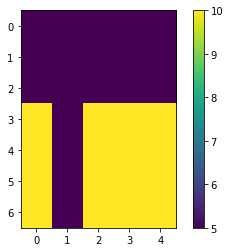

In [7]:
plt.imshow(z2.data)
plt.colorbar()

In [8]:
p = PDRutils("current_models.tab",measurements = z)
p.read_models(unit='adu')

In [9]:
p.computeValidRatios()
p.check_ratio_shapes()
p._observedratios['OI_145/CII_158'].shape

(7, 5)

In [10]:
p.computeDeltaSqMap()
p.computeChisq()
p.writeChisq()
p.computeBestnG0Maps()
print(p.g0_map.data)
print(p.n_map.data)

G0 shape  (35,)
N shape  (35,)
[[ 1778.27941004 10000.          1778.27941004  1778.27941004
   1778.27941004]
 [ 1778.27941004 10000.          1778.27941004  1778.27941004
   1778.27941004]
 [ 1778.27941004 10000.          1778.27941004  1778.27941004
   1778.27941004]
 [   31.6227766  10000.            31.6227766     31.6227766
     31.6227766 ]
 [   31.6227766  10000.            31.6227766     31.6227766
     31.6227766 ]
 [   31.6227766  10000.            31.6227766     31.6227766
     31.6227766 ]
 [   31.6227766  10000.            31.6227766     31.6227766
     31.6227766 ]]
[[1000000.            1000.         1000000.         1000000.
  1000000.        ]
 [1000000.            1000.         1000000.         1000000.
  1000000.        ]
 [1000000.            1000.         1000000.         1000000.
  1000000.        ]
 [ 177827.94100389    1000.          177827.94100389  177827.94100389
   177827.94100389]
 [ 177827.94100389    1000.          177827.94100389  177827.94100389
   177

/n/lupus2/mpound/pdrttest/pdrtpy/pdrutils.py:370: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.g0_map.data[spatial_idx]=g0
/n/lupus2/mpound/pdrttest/pdrtpy/pdrutils.py:372: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.n_map.data[spatial_idx]=n


In [11]:
p._chisq.header
p._chisq.shape

(29, 25, 7, 5)

OrderedDict([('DATAMIN', 31.622776601683793), ('DATAMAX', 10000.0), ('AUTHOR', 'PDR Toolbox 2.0-Beta'), ('DATE', '2019-11-07T15:05:14.343124'), ('BUNIT', 'Log(G0) [Habing]'), ('COMMENT', 'Best-fit interstellar radiation field'), ('HISTORY', 'Measurements provided: OI_145, CI_609, CO_21, CII_158,  Ratios used: OI_145/CII_158, CI_609/CO_21, CII_158/CI_609, ')])


OrderedDict([('DATAMIN', 1000.0), ('DATAMAX', 1000000.0), ('AUTHOR', 'PDR Toolbox 2.0-Beta'), ('DATE', '2019-11-07T15:05:14.343063'), ('BUNIT', 'Log(n) [cm^-2]'), ('COMMENT', 'Best-fit H2 volume density'), ('HISTORY', 'Measurements provided: OI_145, CI_609, CO_21, CII_158,  Ratios used: OI_145/CII_158, CI_609/CO_21, CII_158/CI_609, ')])


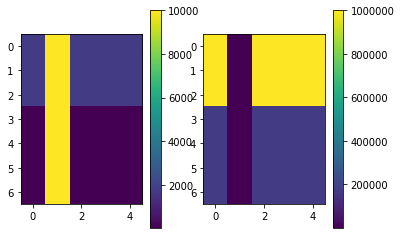

In [12]:
#p._observedratios[p._firstkey(p._observedratios)].header
#p._chisq.header
#p._reducedChisq.header
#p.g0_map.data.max()
#plt.imshow(z3.data)
plt.subplot(1,2,1)
plt.imshow(p.g0_map)#,norm=p._zscale(p.g0_map))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(p.n_map)
plt.colorbar()
print(p.g0_map.header)
print("\n")
print(p.n_map.header)

3


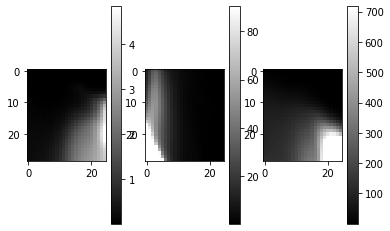

In [13]:
i=1
imax=len(p._modelratios)
print(imax)
for k in p._modelratios:
    plt.subplot(1,imax,i)
    plt.imshow(p._modelratios[k],cmap='gray',norm=p._zscale(p._modelratios[k]))
    #p._plot(p._modelratios[k],cmap='gray_r',image=True,contours=False,levels=None,measurements=None)
    plt.colorbar()
    i=i+1

[[1.15105241 0.28144186 1.15105241 1.15105241 1.15105241]
 [1.15105241 0.28144186 1.15105241 1.15105241 1.15105241]
 [1.15105241 0.28144186 1.15105241 1.15105241 1.15105241]
 [0.80781209 0.28144186 0.80781209 0.80781209 0.80781209]
 [0.80781209 0.28144186 0.80781209 0.80781209 0.80781209]
 [0.80781209 0.28144186 0.80781209 0.80781209 0.80781209]
 [0.80781209 0.28144186 0.80781209 0.80781209 0.80781209]]


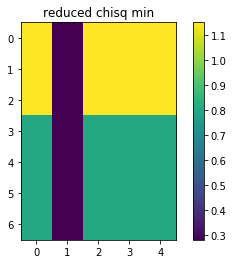

In [14]:
zx=np.amin(p._reducedChisq,(0,1))
plt.imshow(zx)
print(zx)
plt.title("reduced chisq min")
plt.colorbar()

In [15]:

zy=np.amin(p._reducedChisq,(0,1))
print(zy.shape)
gi,ni,yi,xi=np.where(p._reducedChisq==zy)
#print(gi,ni,yi,xi)
#print(len(gi),len(ni),len(xi),len(yi))
idx = np.array(list(zip(yi,xi)))
#print("IDX ",idx.shape)
#print(np.array(list(zip(xi,yi,gi,ni))))
fk = p._firstkey(p._modelratios)
fk2 = p._firstkey(p._observedratios)
newshape = p._observedratios[fk2].shape
ah=np.transpose(np.array([ni,gi]))
#do blah[xi,yi]=[og,on] for instance
og=p._modelratios[fk].wcs.wcs_pix2world(ah,0)[:,1]#.reshape(newshape)
on=p._modelratios[fk].wcs.wcs_pix2world(ah,0)[:,0]#.reshape(newshape)
print("G ",og,og.shape)
print("N ",on,on.shape)
#myg0_map=p._observedratios[fk2].copy()
#print("D ",myg0_map.data.shape)
#myg0_map.data[[yi,xi]]=10**on
#myg0_map.data[idx]=10**on

#print(type(ff))
#print(ff)
#ff=np.where(p._reducedChisq==zy)
#qq=np.transpose(np.vstack(ff))
#uuu=np.flip(qq[:,:2])
#print(uuu.shape,ah.shape)
#print(uuu)
#print(np.transpose(np.array([xi,yi])))
if True:
    ff=np.where(p._reducedChisq==zy)
    #print(np.vstack(ff))
    qq=np.transpose(np.vstack(ff))
    #print(qq.shape)
    #print(np.vstack(np.where(p._reducedChisq==z)))
    #print(qq)
    fk = p._firstkey(p._modelratios)
    fk2 = p._firstkey(p._observedratios)
    newshape = p._observedratios[fk2].shape
    #print("new shape size:",np.prod(newshape))
    print("AH " , ah)
    print("QQ ", np.flip(qq[:,:2]))
    g0=    (p._modelratios[fk].wcs.wcs_pix2world(np.flip(qq[:,:2]),0))[:,1].reshape(newshape)
    n =    (p._modelratios[fk].wcs.wcs_pix2world(np.flip(qq[:,:2]),0))[:,0].reshape(newshape)
    print("G0orig " , g0.reshape(35))
    print("Norig ",n.reshape(35))
if False:
    xx=np.zeros(newshape)
    #print(xx)
    #vv=np.flip(qq[:,2:4])
    #print((qq[:,2:4]))
    #print("qq shape:",np.shape(qq[:,2:4]))
    i=0
    for _x in qq[:,2:4]:
        xx[_x[0],_x[1]]=g0[i]
        #print("x ",_x,xx[_x[0],_x[1]])
        i=i+1

    #xx[qq[:,2:4]]=g0
    #print[xx]
    #print(g0.reshape(newshape)[qq[:,2:4]])
    #print(g0.shape)
    #p._modelratios[fk].wcs.wcs_pix2world(np.flip(qq[:,:2]),0)[:,1]
    #print(qq[:,:2][:,1])
    print(xx)
if False:
    plt.subplot(1,2,1)
    plt.imshow(g0)
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.imshow(n)
    plt.colorbar()
#plt.imshow(myg0_map)
#plt.colorbar()
#print(myg0_map.data)

(7, 5)
G  [1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5
 1.5  1.5  3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25 3.25
 4.   4.   4.   4.   4.   4.   4.  ] (35,)
N  [5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25 5.25
 5.25 5.25 6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.   6.
 3.   3.   3.   3.   3.   3.   3.  ] (35,)
AH  [[17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]]
QQ  [[ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [ 8 18]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [20 15]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]
 [17  8]

In [16]:
print(np.array([ni,gi]))
#print(g0)
#print(n)
#plt.imshow(p.g0_map)
#import ipyvolume as ipv 
#print(p._chisq[1].data.max(),p._chisq[1].data.min())
#ipv.figure()
#ipv.quickvolshow(p._chisq[1].data,lighting=True,data_max=p._chisq[1].data.min(),data_min=5*p._chisq[1].data.min())
#ipv.gcc()
#ipv.widgets.quickvolshow(p._chisq[1])
#ipv.pylab.show()

[[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 20 20 20 20 20 20 20 20
  20 20 20 20  8  8  8  8  8  8  8]
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8 15 15 15 15 15 15 15 15
  15 15 15 15 18 18 18 18 18 18 18]]


In [17]:
#my_c = NDCube(p._reducedChisq.data[0:2],p._reducedChisq.wcs,missing_axes=[False,False,False,False])
#p._reducedChisq.data.ndim
#p._reducedChisq.wcs.naxis
#p._reducedChisq.wcs.wcs_pix2world(2,0,0,ra_dec_order=True)
z=np.amin(p._reducedChisq,(0,1))
#print(z,z.shape)
#np.argmin(p._reducedChisq.data,axis=0)
#qqq=np.where(p._reducedChisq==z)
#q1=np.vstack(qqq)
qq=np.transpose(np.vstack(np.where(p._reducedChisq==z)))
print(qq[:,:2])
#print("QQQ ",qqq,"\nQ1 ",q1,"\n QQ",qq)
#p._reducedChisq.wcs.wcs_pix2world([[8,17]],0)
# qq[:,:2] takes the first two columns of qq
# [:,[1,0]] swaps those columns
# np.flip would also swap them.
#print(qq[:,:2][:,[1,0]])
#print(np.flip(qq[:,:2]))
# correct answer is g0=31.63,n=177828
g0=10**(p._modelratios['OI_145/CII_158'].wcs.wcs_pix2world(np.flip(qq[:,:2]),0))[:,1].reshape(5,3)
n =10**(p._modelratios['OI_145/CII_158'].wcs.wcs_pix2world(np.flip(qq[:,:2]),0))[:,0].reshape(5,3)

print("g0=",g0)
print("n=",n)
#xx=np.array([qqq[1],qqq[0]]).transpose()
#xx

[[ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [ 8 17]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [15 20]
 [18  8]
 [18  8]
 [18  8]
 [18  8]
 [18  8]
 [18  8]
 [18  8]]


ValueError: cannot reshape array of size 35 into shape (5,3)

In [ ]:
g0_map=p._observedratios['OI_145/CII_158'].copy()
g0_map.data=g0
n_map=p._observedratios['OI_145/CII_158'].copy()
n_map.data=n
#p._plot(g0_map,cmap='magma',image=True,contours=True,levels=None,measurements=None)
p._plot(n_map,cmap='magma',image=True,contours=True,levels=None,measurements=None)
p._observedratios['OI_145/CII_158'].data.shape == n_map.data.shape


In [ ]:
p.makeRatioOverlays()

In [ ]:
# flatten the 3 and 4 dimensions of Mat and obtain the 1d index for the maximum
# for each p1 and p2
Mat = p._reducedChisq.data
index1d = np.argmin(Mat.reshape(Mat.shape[0],Mat.shape[1],-1),axis=2)

# compute the indices of the 3 and 4 dimensionality for all p1 and p2
index_x, index_y = np.unravel_index(index1d,Mat[0,0].shape)

# bring the indices into the right shape
index = np.array((index_x,index_y)).reshape(2,-1).transpose()

# get the maxima
val = np.amin(Mat,axis=(2,3)).reshape(-1)

# combine maxima and indices
sol = np.column_stack((val,index))

np.shape(sol)


In [ ]:
p._reducedChisq.data.min()
#p.getBestnG0()
#p._chisq[0][1]

In [ ]:
type(p._measurements['OI_145'])
type(p._chisq)
np.shape(p._chisq)

In [ ]:
plt.imshow(p._chisq.data.transpose(2,3,0,1)[0,0,0:,2:],cmap='rainbow')
plt.contour(p._chisq.data.transpose(2,3,0,1)[0,0,0:,2:])

In [ ]:
figs, axs = plt.subplots(xsize,ysize, sharex=True,sharey=True, figsize=(ysize,xsize))
axs = axs.flatten()
print(type(axs[0]))
print(np.shape(p._reducedChisq))
imgs = np.reshape(p._reducedChisq,(29,25,15))
img2 = np.swapaxes(imgs,0,1)
img3 = np.swapaxes(img2,0,2)
print(np.shape(img3))
print(np.shape(axs))
i=0
for ax in axs:
    #print(type(ax))
    ax.imshow(img3[i],cmap='rainbow')
    #print(np.shape(imgs[i]))
    #print(np.min(img2[i]))
    i=i+1
plt.tight_layout()

In [ ]:
import yt

In [ ]:
p.writeChisq()
ds = yt.load("chisq.fits", nan_mask=0.0)

In [ ]:
np.argmin(img3[1],axis=0)
ind = np.unravel_index(np.argmin(img3, axis=None), img3.shape)
print(ind)

In [ ]:
np.random.rand(ysize,xsize)

In [ ]:
plt.imshow(np.random.rand(ysize,xsize))

In [ ]:
u=np.round(np.random.rand(3*2*4*5),2)
u[::7]=-1
q=u.reshape(4,5,3,2)
print(q)
print(np.amin(q,(0,1)))

In [ ]:
ff=np.where(q==np.amin(q,(0,1)))
print(ff)
qq=np.transpose(np.vstack(ff))
print(qq)

In [ ]:
np.amin(z,1)

In [ ]:
p._chisq.shape

In [ ]:
np.shape(np.delete(p._chisq,3,2))

In [ ]:
u=np.zeros(2*3*4*5).reshape(2,3,4,5)
np.fill_diagonal(u[0][0],-1)
u[0][1][2]=-2
u[0][2][1]=-3
u[1][0][0][3]=-4
u[1][0][1][3]=-4
u[1][0][2][3]=-4
u[1][0][3][3]=-4
u[1][1][0][4]=-5
u[1][1][1][4]=-5
u[1][1][2][4]=-5
u[1][1][3][4]=-5
u[1][2][1]=-9
u[0][1][0][2]=-6
u[0][2][3][4]=-8
u[0][1][3][4]=-7
u[1][2][3][2]=-999
u

In [ ]:
print(np.amin(u,1))
h=np.amin(u,(0,1))
print("h=",h)
print(np.shape(h))

In [ ]:
gg,nn,xx,yy=np.where(u==h)
#print(w)
#print(np.shape(w))
#u[w]